## Comparing Customer Behavior: Surf vs. Ultimate Prepaid Plans

### Project Overview
This analysis evaluates customer behavior to determine which prepaid plan—Ultimate or Surf—generates higher revenue, using a dataset of 500 Megaline telecom clients from 2018.

The study follows a structured approach, including data preparation, exploration, transformation, and statistical analysis. Full details are documented in the README.md

## <center>Section One</center>

## Initialization - Import Necessary Libraries

In [1]:
import os
os.chdir("..")  # Move up one level
print(os.getcwd())  # Confirm the new working directory

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

c:\Users\bijan\OneDrive\Documents\VS Code\Megaline_Prepaid_Comparison


## Load Data - Load CSV Files 

In [2]:
data_mg_calls = pd.read_csv('data/megaline_calls.csv')
data_mg_internet = pd.read_csv('data/megaline_internet.csv')
data_mg_messages = pd.read_csv('data/megaline_messages.csv')
data_mg_plans = pd.read_csv('data/megaline_plans.csv') 
data_mg_users = pd.read_csv('data/megaline_users.csv')

## <center>Section Two</center>

## Data Preparation

- **2.1 Calls Dataframe**

In [3]:
data_mg_calls.info()
display('ID Values:', data_mg_calls['id'].head())
display('User_ID Values:', data_mg_calls['user_id'].head())
display('Call Date Values:', data_mg_calls['call_date'].head())
display('Call Duration Values:', data_mg_calls['duration'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


'ID Values:'

0     1000_93
1    1000_145
2    1000_247
3    1000_309
4    1000_380
Name: id, dtype: object

'User_ID Values:'

0    1000
1    1000
2    1000
3    1000
4    1000
Name: user_id, dtype: int64

'Call Date Values:'

0    2018-12-27
1    2018-12-27
2    2018-12-27
3    2018-12-28
4    2018-12-30
Name: call_date, dtype: object

'Call Duration Values:'

0     8.52
1    13.66
2    14.48
3     5.76
4     4.22
Name: duration, dtype: float64

- **2.2 Internet Dataframe**

In [4]:
data_mg_internet.info()
display('ID Values:', data_mg_internet['id'].head())
display('User_ID Values:', data_mg_internet['user_id'].head())
display('Session Date Values:', data_mg_internet['session_date'].head())
display('MB_Used Values:', data_mg_internet['mb_used'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


'ID Values:'

0     1000_13
1    1000_204
2    1000_379
3    1000_413
4    1000_442
Name: id, dtype: object

'User_ID Values:'

0    1000
1    1000
2    1000
3    1000
4    1000
Name: user_id, dtype: int64

'Session Date Values:'

0    2018-12-29
1    2018-12-31
2    2018-12-28
3    2018-12-26
4    2018-12-27
Name: session_date, dtype: object

'MB_Used Values:'

0     89.86
1      0.00
2    660.40
3    270.99
4    880.22
Name: mb_used, dtype: float64

- **2.3 Internet Dataframe**

In [5]:
data_mg_messages.info()
display('ID Values:', data_mg_messages['id'].head())
display('User_ID Values:', data_mg_messages['user_id'].head())
display('Message_Date Values:', data_mg_messages['message_date'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


'ID Values:'

0    1000_125
1    1000_160
2    1000_223
3    1000_251
4    1000_255
Name: id, dtype: object

'User_ID Values:'

0    1000
1    1000
2    1000
3    1000
4    1000
Name: user_id, dtype: int64

'Message_Date Values:'

0    2018-12-27
1    2018-12-31
2    2018-12-31
3    2018-12-27
4    2018-12-26
Name: message_date, dtype: object

- **2.4 Plans Dataframe**

In [6]:
data_mg_plans.info()
display('Messages_Included Values:', data_mg_plans['messages_included'].head(2))
display('MB_Per_Month_Included Values:', data_mg_plans['mb_per_month_included'].head(2))
display('Minutes_Included Values:', data_mg_plans['minutes_included'].head(2))
display('USD_Monthly_Pay Values:', data_mg_plans['usd_monthly_pay'].head(2))
display('USD_Per_GB Values:', data_mg_plans['usd_per_gb'].head(2))
display('USD_Per_Message Values:', data_mg_plans['usd_per_message'].head(2))
display('USD_Per_Minute Values:', data_mg_plans['usd_per_minute'].head(2))
display('Plan_Name Values:', data_mg_plans['plan_name'].head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


'Messages_Included Values:'

0      50
1    1000
Name: messages_included, dtype: int64

'MB_Per_Month_Included Values:'

0    15360
1    30720
Name: mb_per_month_included, dtype: int64

'Minutes_Included Values:'

0     500
1    3000
Name: minutes_included, dtype: int64

'USD_Monthly_Pay Values:'

0    20
1    70
Name: usd_monthly_pay, dtype: int64

'USD_Per_GB Values:'

0    10
1     7
Name: usd_per_gb, dtype: int64

'USD_Per_Message Values:'

0    0.03
1    0.01
Name: usd_per_message, dtype: float64

'USD_Per_Minute Values:'

0    0.03
1    0.01
Name: usd_per_minute, dtype: float64

'Plan_Name Values:'

0        surf
1    ultimate
Name: plan_name, dtype: object

- **2.5 Users Dataframe**

In [7]:
data_mg_users.info()
display('User_ID Values:', data_mg_users['user_id'].head())
display('First_Name Values:', data_mg_users['first_name'].head())
display('Last_Name Values:', data_mg_users['last_name'].head())
display('Age Values:', data_mg_users['age'].head())
display('City Values:', data_mg_users['city'].head())
display('Reg_Date Values:', data_mg_users['reg_date'].head())
display('Plan Values:', data_mg_users['plan'].head())
display('Churn_Date Values:', data_mg_users['churn_date'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


'User_ID Values:'

0    1000
1    1001
2    1002
3    1003
4    1004
Name: user_id, dtype: int64

'First_Name Values:'

0    Anamaria
1      Mickey
2      Carlee
3    Reynaldo
4     Leonila
Name: first_name, dtype: object

'Last_Name Values:'

0        Bauer
1    Wilkerson
2      Hoffman
3      Jenkins
4     Thompson
Name: last_name, dtype: object

'Age Values:'

0    45
1    28
2    36
3    52
4    40
Name: age, dtype: int64

'City Values:'

0    Atlanta-Sandy Springs-Roswell, GA MSA
1          Seattle-Tacoma-Bellevue, WA MSA
2     Las Vegas-Henderson-Paradise, NV MSA
3                            Tulsa, OK MSA
4          Seattle-Tacoma-Bellevue, WA MSA
Name: city, dtype: object

'Reg_Date Values:'

0    2018-12-24
1    2018-08-13
2    2018-10-21
3    2018-01-28
4    2018-05-23
Name: reg_date, dtype: object

'Plan Values:'

0    ultimate
1        surf
2        surf
3        surf
4        surf
Name: plan, dtype: object

'Churn_Date Values:'

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: churn_date, dtype: object

In [8]:
display('Sample of User IDs:', data_mg_calls[['user_id', 'duration']].sample(5))

'Sample of User IDs:'

,user_id,duration
80405,1291,3.04
38094,1142,11.70
78912,1282,3.62
50326,1181,8.87
122198,1432,0.00


## <center>Section Three</center>

## Data Exploration and Quality Checks

**Plans - Print the general/summary information about the plans' DataFrame**

- **3.1 Plans Dataframe**

In [9]:
display('First Few Rows - Megaline Plans:', data_mg_plans)
display('Unique Values Count for each Megaline Plans column:', data_mg_plans.nunique())
display('Missing Values Count for each Megaline Plans column:', data_mg_plans.isnull().sum())

'First Few Rows - Megaline Plans:'

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


'Unique Values Count for each Megaline Plans column:'

messages_included        2
mb_per_month_included    2
minutes_included         2
usd_monthly_pay          2
usd_per_gb               2
usd_per_message          2
usd_per_minute           2
plan_name                2
dtype: int64

'Missing Values Count for each Megaline Plans column:'

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Print a sample of data for plans

Although calling both .info() and .sample() is unnecessary for a dataset with only two rows, I included them as part of the project exercise to reinforce the habit of systematically evaluating dataset structures and sample records.

In [10]:
display('Plans Data:', data_mg_plans.sample(n=2))

'Plans Data:'

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


**Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?**

The Plans dataset consists of 2 rows and 8 columns: `messages_included`, `mb_per_month_included`, `minutes_included`, `usd_monthly_pay`, `usd_per_gb`, `usd_per_message`, `usd_per_minute`, and `plan_name`.<br> 
- Data types include:<br> 
  - float64: `usd_per_message`, `usd_per_minute`<br> 
  - int64: `messages_included`, `mb_per_month_included`, `minutes_included`, `usd_monthly_pay` and `usd_per_gb` 
  - object: `plan_name`

<u>POTENTIAL ISSUE 1:</u><br>
The `mb_per_month_included` column currently uses megabytes (MB).  
SOLUTION: Converting MB to GB aligns with Megaline's policy (i.e., Surf: 15GB and Ultimate: 30GB) and is essential for accurate analysis, calculations, and comparison.

<u>Key Improvement(s):</u>  
Original column: Maintain source by keeping the original `mb_per_month_included` column for accurate calculations.  
New Column: Adding a new column named `gb_conversion` with ceiling-rounded values for easy display and interpretation.  

<u>POTENTIAL ISSUE 2:</u><br>
Currency-related columns: `usd_monthly_pay (int64)` and `usd_per_gb (int64)` may not be the appropriate data types for decimal values. Incorrect data types can lead to unexpected results during calculations and analyses.  
SOLUTION: All currency-related columns (`usd_per_message`, `usd_per_minute`, `usd_per_gb`, `usd_monthly_pay`) should be converted to float64 for accurate representation of decimal values (e.g., cents).  

<u>Key Improvement(s):</u>  
Data Integrity: Ensures accurate representation of currency values.  
Enhanced Analysis: Allows for more reliable and precise calculations.  

<u>POTENTIAL ISSUE 3:</u> The `plan_name` column is currently stored as an object data type, which can consume more memory than necessary for categorical data. This can impact performance, especially with larger datasets.  
SOLUTION: Convert the `plan_name` column to the category data type for improved memory efficiency and to better represent categorical data.  

<u>Key Improvement(s):</u>  
Memory Efficiency: Reduces memory consumption, especially with large datasets.  
Data Integrity: Better represents categorical data, improving data quality and consistency.  
Enhanced Analysis: Facilitates efficient data analysis and visualization.  

**Fix Data - Fix obvious issues with the data given the initial observations.**

In [11]:
data_mg_plans['mb_to_gb_converted'] = np.ceil(data_mg_plans['mb_per_month_included'] / 1024)
display('MB and GB Values:', 
       'Megabytes:', data_mg_plans['mb_per_month_included'],
       'Gigabytes:', data_mg_plans['mb_to_gb_converted'])

data_mg_plans['usd_per_gb'] = data_mg_plans['usd_per_gb'].astype('float64')
data_mg_plans['usd_monthly_pay'] = data_mg_plans['usd_monthly_pay'].astype('float64')
display('Currency Columns Converted to Float:', 
       'USD_per_GB:', data_mg_plans['usd_per_gb'],
       'USD_Monthly_Pay:', data_mg_plans['usd_monthly_pay'])

data_mg_plans['plan_name'] = data_mg_plans['plan_name'].astype('category')
display('Plan Names as Category:', 
       'Column Type:', data_mg_plans['plan_name'].dtype,
       'Values:', data_mg_plans['plan_name'])

'MB and GB Values:'

'Megabytes:'

0    15360
1    30720
Name: mb_per_month_included, dtype: int64

'Gigabytes:'

0    15.0
1    30.0
Name: mb_to_gb_converted, dtype: float64

'Currency Columns Converted to Float:'

'USD_per_GB:'

0    10.0
1     7.0
Name: usd_per_gb, dtype: float64

'USD_Monthly_Pay:'

0    20.0
1    70.0
Name: usd_monthly_pay, dtype: float64

'Plan Names as Category:'

'Column Type:'

CategoricalDtype(categories=['surf', 'ultimate'], ordered=False, categories_dtype=object)

'Values:'

0        surf
1    ultimate
Name: plan_name, dtype: category
Categories (2, object): ['surf', 'ultimate']

**Enrich Data - Add additional factors to the data if you believe they might be useful.**

<u>ADDITIONAL FACTOR(s) 1:</u>  
It may be useful to check for outliers or inconsistent values in `usd_per_message` and `usd_per_minute` that may skew analysis.  

<u>POTENTIAL ISSUE 1:</u>  
Perform a descriptive statistics check on numerical columns to identify outliers or irregularities.  

<u>Key Improvement(s):</u>  
Ensures data integrity by identifying anomalies.  

**Users Dataframe - Print the general/summary information about the users' DataFrame**

- **3.2 Users Dataframe**

In [12]:
display('First Few Rows - Megaline Users:', data_mg_users.sample(10))
display('Unique User_ID column Values Count:', data_mg_users['user_id'].nunique())
display('Unique First_Name Values:', data_mg_users['first_name'].nunique())
display('Unique Last_Name Values:', data_mg_users['last_name'].nunique())
display('Unique Age Values:', data_mg_users['age'].nunique())
display('Unique City Values:', data_mg_users['city'].nunique())
display('Earliest Registration_Date:', data_mg_users['reg_date'].min())
display('Latest Registration_Date:', data_mg_users['reg_date'].max())
display('Total Number of Churned Users:', data_mg_users['churn_date'].notnull().sum())
display('Count of Users Who Churned on each Date:', data_mg_users['churn_date'].value_counts())

'First Few Rows - Megaline Users:'

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
299,1299,Keitha,Harrison,64,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-19,surf,NaN
162,1162,Mark,Farley,20,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-07-12,ultimate,NaN
17,1017,Boris,Gates,61,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-08-26,surf,NaN
119,1119,Anderson,Palmer,60,"Louisville/Jefferson County, KY-IN MSA",2018-10-05,surf,NaN
422,1422,Georgianne,Huff,41,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-04-03,ultimate,NaN
102,1102,Marquitta,Walton,30,"Riverside-San Bernardino-Ontario, CA MSA",2018-02-20,ultimate,NaN
273,1273,Hermila,Ryan,25,"Baton Rouge, LA MSA",2018-10-13,ultimate,NaN
138,1138,Arlie,Higgins,66,"Riverside-San Bernardino-Ontario, CA MSA",2018-02-06,surf,NaN
146,1146,Loma,Mcneil,42,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-10-13,surf,NaN
179,1179,Darcey,Baird,22,"Dallas-Fort Worth-Arlington, TX MSA",2018-04-27,surf,NaN


'Unique User_ID column Values Count:'

500

'Unique First_Name Values:'

458

'Unique Last_Name Values:'

399

'Unique Age Values:'

58

'Unique City Values:'

73

'Earliest Registration_Date:'

'2018-01-01'

'Latest Registration_Date:'

'2018-12-31'

'Total Number of Churned Users:'

np.int64(34)

'Count of Users Who Churned on each Date:'

churn_date
2018-12-18    3
2018-11-14    2
2018-12-31    2
2018-12-19    2
2018-11-16    1
2018-10-07    1
2018-12-30    1
2018-11-11    1
2018-11-24    1
2018-12-12    1
2018-12-27    1
2018-11-29    1
2018-09-07    1
2018-12-22    1
2018-11-30    1
2018-07-31    1
2018-10-13    1
2018-12-15    1
2018-10-03    1
2018-10-22    1
2018-08-16    1
2018-12-26    1
2018-09-01    1
2018-11-21    1
2018-08-19    1
2018-12-10    1
2018-09-17    1
2018-11-18    1
2018-09-18    1
Name: count, dtype: int64

Print a sample of data for users

In [13]:
display('Sample of User Data:', data_mg_users.sample(10))

'Sample of User Data:'

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
17,1017,Boris,Gates,61,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-08-26,surf,NaN
144,1144,Kaycee,Peterson,65,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-21,ultimate,NaN
111,1111,Booker,Hahn,75,"Urban Honolulu, HI MSA",2018-09-17,surf,NaN
193,1193,Lacresha,Olsen,18,"Houston-The Woodlands-Sugar Land, TX MSA",2018-07-07,surf,NaN
370,1370,Nenita,Vasquez,49,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-09-12,ultimate,NaN
459,1459,Santos,Head,40,"San Francisco-Oakland-Berkeley, CA MSA",2018-04-27,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
259,1259,Etsuko,Perry,63,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-03-16,surf,NaN
446,1446,Pasquale,Ball,52,"Austin-Round Rock-Georgetown, TX MSA",2018-09-10,surf,NaN
20,1020,Rutha,Bell,56,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-08,surf,NaN


For my reference, assessing missing values in the Users dataset related to churn

In [14]:
print("NaN values before:")
print(data_mg_users.isna().sum())

data_mg_users['customer_status'] = 'Churned'  
data_mg_users.loc[data_mg_users['churn_date'].isna(), 'customer_status'] = 'Active'  

print("\nNaN values after:")
display(data_mg_users.isna().sum())

print("\nCustomer Status Count:")
display(data_mg_users['customer_status'].value_counts())

NaN values before:
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

NaN values after:


user_id              0
first_name           0
last_name            0
age                  0
city                 0
reg_date             0
plan                 0
churn_date         466
customer_status      0
dtype: int64


Customer Status Count:


customer_status
Active     466
Churned     34
Name: count, dtype: int64

**Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?**

The Users dataset consists of 500 rows and 8 columns: `user_id`, `first_name`, `last_name`, `age`, `city`, `reg_date`, `plan` and `churn_date`.<br> 
- Data types include: 
  - int64: `user_id` and `age` 
  - object: `first_name`, `last_name`, `city`, `reg_date`, `plan` and `churn_date`

<u>POTENTIAL ISSUE 1:</u> The `churn_date` and `reg_date` columns are not in the appropriate datetime format (datetime64[ns]), which can affect date related calculations. This may also lead to incorrect calculations, sorting errors and difficulty filtering.
 
<u>SOLUTION:</u>
Converting `churn_date` and `reg_date` columns to datetime64[ns] data type format will make it easier to work with dates correctly, sort the data by date and find data from a specific time period. Since we are working with a pandas DataFrame, we can utilize the to_datetime() function to convert these columns.

<u>Key Improvement(s):</u> 
Accurate data calculations which enables precise calculations involving dates - Efficient sorting which facilitates efficient sorting - Flexible filtering which enables easy and accurate filtering

<u>POTENTIAL ISSUE / Solution 2:</u>
As noted in Section 1.4, converting the `plan_name` column to the category data type allows for improved memory efficiency and to better represent categorical data.

<u>Key Improvement(s):</u>
Memory efficiancy, data integrity and enhanced analysis

**Fix Data - Fix obvious issues with the data given the initial observations.**

In [15]:
data_mg_users['churn_date'] = pd.to_datetime(data_mg_users['churn_date'])
display(data_mg_users['churn_date'].dtype)
display(data_mg_users[data_mg_users['churn_date'].notna()]['churn_date'].sample(5))

data_mg_users['reg_date'] = pd.to_datetime(data_mg_users['reg_date'])
display(data_mg_users['reg_date'].dtype)
display(data_mg_users[data_mg_users['reg_date'].notna()]['reg_date'].sample(5))

dtype('<M8[ns]')

6     2018-12-18
83    2018-12-18
281   2018-11-14
246   2018-07-31
12    2018-11-16
Name: churn_date, dtype: datetime64[ns]

dtype('<M8[ns]')

39    2018-05-30
236   2018-04-04
481   2018-12-27
24    2018-08-21
224   2018-06-28
Name: reg_date, dtype: datetime64[ns]

Enrich Data - Add additional factors to the data if you believe they might be useful

<u>ADDITIONAL FACTOR(s) 1:</u><br>
The current `city` column utilizes a Metropolitan Statistical Area (MSA) format, which combines the city name with neighborhood information. In some cases, multiple neighborhoods are included within a single "city" entry.<br> 
SOLUTION: Use a loop to split the `city` column into simple, cleaner columns: `city`, `neighborhood1`, `neighborhood2`. For rows without a neighborhood (indicated by a single hyphen or no hyphen), the loop will assign a "NAN" value when that criteria is meet.

<u>Key Improvements:</u><br>
Data Clarity: Separate combined information into distinct columns and makes with data point accessible<br>
Analysis Benefits: Enables city analysis w/o neighborhood granularity while facilitates state grouping and filtering<br> 
Data Quality: Handles missing neighborhoods, maintains original information while improving data consistency

In [16]:
data_mg_users['original_city'] = data_mg_users['city'] 
display('BEFORE - Original MSA format:',
        data_mg_users['original_city'].head())
#initial format not displaying

data_mg_users['city'] = data_mg_users['city'].str.split('-').str[0]

data_mg_users['neighborhood1'] = data_mg_users['city'].str.split('-').str[1]

data_mg_users['neighborhood2'] = data_mg_users['city'].str.split('-').str[2]

data_mg_users['state'] = data_mg_users['city'].str.split(',').str[1].str.strip().str[:2]

display('\nAFTER - Split format:',
        '\nCity:', data_mg_users['city'].head(),
        '\nNeighborhood 1:', data_mg_users['neighborhood1'].head(),
        '\nNeighborhood 2:', data_mg_users['neighborhood2'].head(),
        '\nState:', data_mg_users['state'].head())

'BEFORE - Original MSA format:'

0    Atlanta-Sandy Springs-Roswell, GA MSA
1          Seattle-Tacoma-Bellevue, WA MSA
2     Las Vegas-Henderson-Paradise, NV MSA
3                            Tulsa, OK MSA
4          Seattle-Tacoma-Bellevue, WA MSA
Name: original_city, dtype: object

'\nAFTER - Split format:'

'\nCity:'

0          Atlanta
1          Seattle
2        Las Vegas
3    Tulsa, OK MSA
4          Seattle
Name: city, dtype: object

'\nNeighborhood 1:'

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: neighborhood1, dtype: float64

'\nNeighborhood 2:'

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: neighborhood2, dtype: float64

'\nState:'

0    NaN
1    NaN
2    NaN
3     OK
4    NaN
Name: state, dtype: object

**Calls - Print the general/summary information about the calls' DataFrame**

- **3.3 Calls Dataframe**

In [17]:
display('First Few Rows - Megaline Calls:', data_mg_calls.sample(10))
display('Unique Call IDs:', data_mg_calls['id'].nunique())
display('Unique ID Values Count:', data_mg_calls['id'].value_counts())
display('Unique User_ID Values Count:', data_mg_calls['user_id'].nunique())
display('Call Frequency by User:', data_mg_calls['user_id'].value_counts())
display('Call Frequency by Date:', data_mg_calls['call_date'].value_counts())
display('Missing Duration Values Count:', data_mg_calls['duration'].isnull().sum())

'First Few Rows - Megaline Calls:'

,id,user_id,call_date,duration
67959,1245_182,1245,2018-11-08,0.00
87836,1321_708,1321,2018-07-12,12.40
4648,1020_167,1020,2018-12-27,0.00
60262,1217_83,1217,2018-10-30,0.84
60753,1220_107,1220,2018-08-14,0.00
70461,1251_472,1251,2018-06-26,8.68
48365,1174_342,1174,2018-06-21,0.00
113087,1397_853,1397,2018-07-28,11.86
2516,1010_92,1010,2018-03-16,0.00
107149,1380_309,1380,2018-09-28,15.07


'Unique Call IDs:'

137735

'Unique ID Values Count:'

id
1499_203    1
1000_93     1
1000_145    1
1000_247    1
1000_309    1
           ..
1000_705    1
1000_693    1
1000_544    1
1000_530    1
1000_521    1
Name: count, Length: 137735, dtype: int64

'Unique User_ID Values Count:'

481

'Call Frequency by User:'

user_id
1324    1300
1077    1224
1334    1140
1362    1121
1320    1080
        ... 
1104       4
1323       3
1306       3
1452       3
1034       2
Name: count, Length: 481, dtype: int64

'Call Frequency by Date:'

call_date
2018-12-27    1091
2018-12-28    1085
2018-12-30    1080
2018-12-24    1078
2018-12-29    1070
              ... 
2018-01-17       6
2018-01-26       6
2018-01-15       5
2018-01-18       4
2018-01-24       3
Name: count, Length: 351, dtype: int64

'Missing Duration Values Count:'

np.int64(0)

**Print a sample of data for calls**

In [18]:
display('Sample of Calls Data:', data_mg_calls.sample(10))

'Sample of Calls Data:'

,id,user_id,call_date,duration
46991,1171_22,1171,2018-06-05,6.03
110820,1390_269,1390,2018-11-08,1.73
74199,1263_183,1263,2018-05-27,6.43
104442,1368_129,1368,2018-10-09,3.70
137246,1498_174,1498,2018-08-28,5.37
108261,1382_1487,1382,2018-12-31,6.88
25194,1097_297,1097,2018-11-12,0.00
17045,1066_147,1066,2018-06-11,0.82
30583,1114_484,1114,2018-11-07,19.29
126165,1447_30,1447,2018-10-31,16.41


**Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?**

The Calls dataset consists of 137735 rows and 4 columns: `id`, `user_id`, `call_date` and `duration`.<br> 
- Data types include: 
  - object: `id` and `call_date` 
  - int64: `user_id` 
  - float64: `duration`

<u>POTENTIAL ISSUE 1:</u>
The `id` column combines the `user_id` and `sequence number` as a string. This is less efficient for indexing.<br> 
SOLUTION: Split `id` column (comprised of) `user_id` and `call_sequence` into 2 columns

<u>Key Improvement(s):</u> 
Better organization, easier to track calls per user and more efficient storage

<u>POTENTIAL ISSUE 2:</u>
`call_date` is stored as an object rather than datetime. This can cause issues with date related calculations, sorting and filtering.<br>
- Potential solution: Convert `call_date` to the datetime64[ns] data type using pd.to_datetime().

<u>Key Improvement(s):</u>
Enables accurate sorting and filtering by date and facilitates time based calculations

**Fix Data - Fix obvious issues with the data given the initial observations.**

In [19]:
data_mg_calls[['user_id_from_id', 'call_sequence']] = data_mg_calls['id'].str.split('_', expand=True)
display(data_mg_calls['user_id_from_id'].sample(5), 
       data_mg_calls['call_sequence'].sample(5))


data_mg_calls['call_date'] = pd.to_datetime(data_mg_calls['call_date'])
display(data_mg_calls['call_date'].dtype)

10920     1049
46363     1167
41698     1153
134755    1489
90877     1328
Name: user_id_from_id, dtype: object

25069     172
122170     20
22864     126
88038      79
58641      34
Name: call_sequence, dtype: object

dtype('<M8[ns]')

**Enrich Data - Add additional factors to the data if you believe they might be useful.**

<u>ADDITIONAL FACTOR(s) 1:</u><br> 
Calculating daily call averages could be useful. Since we converted the `call_date` column pd.to_datetime(data_mg_calls['call_date']), we can group the data and count the number of calls for each date.

<u>ADDITIONAL FACTOR(s) 2:</u><br> 
Calculating daily peak call hours would be useful, but the `call_date` column only contains the date.

  - `.describe()` does not effectively handle the `call_date` column (datetime64[ns] dtype), resulting in missing `mean` and `std` values. Instead, a function was used to calculate the daily average, minimum, and maximum call counts.

In [20]:
#data_mg_calls.describe()

In [21]:
def average_daily_calls(call_rate):
    call_rate['call_date'] = pd.to_datetime(call_rate['call_date'])
    
    daily_calls = call_rate.groupby('call_date').size()
    
    avg_calls = daily_calls.mean()
    min_calls = daily_calls.min()
    max_calls = daily_calls.max()
    
    highest_volume_days = daily_calls[daily_calls == max_calls]
    
    return{
        'average calls per day':round(avg_calls, 2),
          'min calls in a day': min_calls,
          'max calls in a day': max_calls,
          'highest volume days': highest_volume_days
          }
    
    
results = average_daily_calls(data_mg_calls)
    
display('Daily Call Analysis:')
display(f"Average Calls per Day: {results['average calls per day']}")
display(f"Minimum Calls per Day: {results['min calls in a day']}")
display(f"Maximum Calls per Day: {results['max calls in a day']}")
display(f"Highest Daily Call Volume: {results['highest volume days']}")

'Daily Call Analysis:'

'Average Calls per Day: 392.41'

'Minimum Calls per Day: 3'

'Maximum Calls per Day: 1091'

'Highest Daily Call Volume: call_date\n2018-12-27    1091\ndtype: int64'

**Messages - Print the general/summary information about the messages' DataFrame**

- **3.4 Messages Dataframe**

In [22]:
display('First Few Rows - Megaline Messages:', data_mg_messages.sample(10))
display('Unique Messages ID Counts:', data_mg_messages['id'].nunique())
display('Unique Messages User_ID Count:', data_mg_messages['user_id'].nunique())
display('Messages Frequency by User:', data_mg_messages['user_id'].value_counts())
display('Messages Frequency Count:', data_mg_messages['message_date'].nunique())
display('Messages Frequency by Date:', data_mg_messages['message_date'].value_counts())

'First Few Rows - Megaline Messages:'

,id,user_id,message_date
13750,1091_67,1091,2018-11-20
4972,1046_34,1046,2018-11-20
72025,1467_357,1467,2018-09-12
15709,1103_73,1103,2018-11-30
69003,1447_71,1447,2018-11-19
4358,1043_571,1043,2018-12-26
13372,1088_384,1088,2018-11-07
51763,1335_354,1335,2018-06-23
1420,1013_71,1013,2018-12-30
8750,1065_21,1065,2018-10-12


'Unique Messages ID Counts:'

76051

'Unique Messages User_ID Count:'

402

'Messages Frequency by User:'

user_id
1132    1288
1328    1233
1324    1175
1470    1056
1077     804
        ... 
1481       3
1190       3
1161       2
1479       1
1323       1
Name: count, Length: 402, dtype: int64

'Messages Frequency Count:'

351

'Messages Frequency by Date:'

message_date
2018-12-28    702
2018-12-27    701
2018-12-25    699
2018-12-31    699
2018-12-18    688
             ... 
2018-01-28      3
2018-02-18      2
2018-01-15      2
2018-01-24      2
2018-01-19      1
Name: count, Length: 351, dtype: int64

**Print a sample of data for messages**

In [23]:
display('Sample of Messages Data:', data_mg_messages.sample(10))

'Sample of Messages Data:'

,id,user_id,message_date
58057,1365_213,1365,2018-11-14
69235,1450_14,1450,2018-12-03
403,1004_68,1004,2018-10-01
62474,1392_249,1392,2018-09-03
15411,1101_468,1101,2018-11-17
8130,1061_136,1061,2018-11-30
65158,1417_46,1417,2018-09-12
15087,1101_144,1101,2018-12-30
39021,1254_855,1254,2018-12-17
55466,1348_401,1348,2018-11-13


**Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?**

The Messages dataset consists of 76051 rows and 3 columns: `id`, `user_id`, and `message_date`.<br> 
- Data types include: 
  - object: `id` and `message_date` 
  - int64: `user_id`

<u>POTENTIAL ISSUE 1:</u>
The `id` column combines the user_id and sequence number as a string. This is less efficient for indexing.<br> 
SOLUTION: Split `id` column (comprised of) user_id and message_sequence into 2 columns

<u>Key Improvement(s):</u><br>
Better organization, easier to track calls per user and more efficient storage

<u>POTENTIAL ISSUE 2:</u>
`message_date` is stored as an object rather than datetime. This can cause issues with date related calculations, sorting and filtering.<br> 
Potential solution: Convert `message_date` to the datetime64[ns] data type using pd.to_datetime().

<u>Key Improvement(s):</u>
Enables accurate sorting and filtering by date and facilitates time based calculations

**Fix Data - Fix obvious issues with the data given the initial observations.**

In [24]:
data_mg_messages[['user_id_from_id', 'message_sequence']] = data_mg_messages['id'].str.split('_', expand=True)
display(data_mg_messages['user_id_from_id'].sample(5), 
       data_mg_messages['message_sequence'].sample(5))


data_mg_messages['message_date'] = pd.to_datetime(data_mg_messages['message_date'])
display(data_mg_messages['message_date'].dtype)

68334    1440
26849    1164
13646    1090
19105    1123
8839     1066
Name: user_id_from_id, dtype: object

72470     98
75839     77
70312    306
71698     30
14274    293
Name: message_sequence, dtype: object

dtype('<M8[ns]')

**Enrich Data - Add additional factors to the data if you believe they might be useful**

<u>ADDITIONAL FACTOR(s) 1:</u><br> 
Calculating daily message averages could be useful. Since we converted the `message_date` column to pd.to_datetime(data_mg_messages['message_date']), we can group the data and count the number of messages for each date.

<u>ADDITIONAL FACTOR(s) 2:</u><br>
Calculating daily peak messaging hours would be useful, but the message_date column only contains the date.

  - `.describe()` does not effectively handle the `message_date` column (datetime64[ns] dtype), resulting in missing `mean` and `std` values. Instead, a function was used to calculate the daily average, minimum, and maximum messages counts.

In [25]:
#data_mg_messages.describe()

In [26]:
def average_daily_messages(message_rate):
        
    daily_messages = message_rate.groupby('message_date').size()
    
    avg_messages = daily_messages.mean()
    min_messages = daily_messages.min()
    max_messages = daily_messages.max()
    
    highest_message_days = daily_messages[daily_messages == max_messages]
    
    return{
        'average messages per day':round(avg_messages, 2),
          'min messages in a day': min_messages,
          'max messages in a day': max_messages,
          'highest volume days': highest_message_days
          }
  
    
results = average_daily_messages(data_mg_messages)
    
display('Daily Message Analysis:')
display(f"Average Messages per Day: {results['average messages per day']}")
display(f"Minimum Messages per Day: {results['min messages in a day']}")
display(f"Maximum Messages per Day: {results['max messages in a day']}")
display(f"Highest Daily Message Volume: {results['highest volume days']}")

'Daily Message Analysis:'

'Average Messages per Day: 216.67'

'Minimum Messages per Day: 1'

'Maximum Messages per Day: 702'

'Highest Daily Message Volume: message_date\n2018-12-28    702\ndtype: int64'

Internet - Print the general/summary information about the internet DataFrame

- **3.5 Internet Dataframe**

In [27]:
display('First Few Rows - Megaline Internet Data:', data_mg_internet.sample(10))
display('Unique Internet Session Identifier Counts:', data_mg_internet['id'].nunique())
display('Unique User_ID Internet Session Count:', data_mg_internet['user_id'].nunique())
display('Internet Session Frequency by User:', data_mg_internet['user_id'].value_counts())
display('Internet Session Frequency by Date:', data_mg_internet['session_date'].nunique())
display('Internet Session Trends by Date:', data_mg_internet['session_date'].value_counts())
display('Internet Usage Counts:', data_mg_internet['mb_used'].isnull().sum())

'First Few Rows - Megaline Internet Data:'

,id,user_id,session_date,mb_used
55739,1252_161,1252,2018-08-24,729.80
11938,1059_37,1059,2018-06-08,391.35
57094,1257_361,1257,2018-12-28,331.49
38360,1172_15,1172,2018-10-18,986.45
102593,1491_34,1491,2018-08-22,164.94
17606,1079_211,1079,2018-09-10,0.00
17892,1080_223,1080,2018-08-26,438.82
59249,1267_51,1267,2018-12-12,0.00
40100,1181_232,1181,2018-10-29,279.17
63710,1292_414,1292,2018-07-23,204.23


'Unique Internet Session Identifier Counts:'

104825

'Unique User_ID Internet Session Count:'

489

'Internet Session Frequency by User:'

user_id
1185    851
1028    752
1171    716
1498    657
1214    652
       ... 
1323      3
1108      2
1034      2
1306      1
1452      1
Name: count, Length: 489, dtype: int64

'Internet Session Frequency by Date:'

351

'Internet Session Trends by Date:'

session_date
2018-12-24    851
2018-12-30    845
2018-12-27    830
2018-12-21    826
2018-12-31    823
             ... 
2018-01-23      3
2018-01-15      2
2018-01-16      2
2018-01-20      2
2018-01-18      2
Name: count, Length: 351, dtype: int64

'Internet Usage Counts:'

np.int64(0)

**Print a sample of data for the internet traffic**

In [28]:
display('Sample of Internet Data:', data_mg_internet.sample(10))

'Sample of Internet Data:'

,id,user_id,session_date,mb_used
45680,1203_5,1203,2018-09-15,505.60
54557,1246_458,1246,2018-05-18,0.00
59213,1267_15,1267,2018-12-31,593.14
74949,1353_112,1353,2018-11-08,660.22
100965,1478_116,1478,2018-12-30,175.75
28522,1131_105,1131,2018-09-11,132.00
70599,1329_308,1329,2018-10-14,298.52
11155,1055_160,1055,2018-07-17,833.24
90401,1416_133,1416,2018-11-28,333.16
1949,1010_108,1010,2018-05-11,0.00


**Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?**

The Internet dataset consists of 104825 rows and 4 columns: `id`, `user_id`, `session_date` and `mb_used`. 
- Data types include: 
  - object: `id` and `session_date` 
  - int64: `user_id` 
  - float64: `mb_used`

<u>POTENTIAL ISSUE 1:</u><br>
The `id` column combines the user_id and sequence number as a string. This is less efficient for indexing. 
SOLUTION: Split `id` column (comprised of) user_id and internet_sequence into 2 columns

<u>Key Improvement(s):</u><br>
Better organization, easier to track calls per user and more efficient storage

<u>POTENTIAL ISSUE 2:</u><br>
`session_date` is stored as an object rather than datetime. This can cause issues with date related calculations, sorting and filtering.<br> 
Potential solution: Convert `session_date` to the datetime64[ns] data type using pd.to_datetime().

<u>Key Improvement(s):</u><br> 
Enables accurate sorting and filtering by date and facilitates time based calculations

Fix Data - Fix obvious issues with the data given the initial observations.

In [29]:
data_mg_internet[['user_id_from_id', 'internet_sequence']] = data_mg_internet['id'].str.split('_', expand=True)
display(data_mg_internet['user_id_from_id'].sample(5), 
       data_mg_internet['internet_sequence'].sample(5))


data_mg_internet['session_date'] = pd.to_datetime(data_mg_internet['session_date'])
display(data_mg_internet['session_date'].dtype)

72540    1337
34230    1155
75876    1357
9969     1050
58946    1264
Name: user_id_from_id, dtype: object

20579    255
18053    117
10812    348
45320    182
46861     77
Name: internet_sequence, dtype: object

dtype('<M8[ns]')

**Enrich Data - Add additional factors to the data if you believe they might be useful.**

<u>ADDITIONAL FACTOR(s) 1:</u><br>
Calculating daily internet usage averages could be useful. Since we converted the `session_date` column to pd.to_datetime(data_mg_internet['session_date']), we can group the data and count the number of internet sessions for each date.

  - .describe() does not effectively handle the `session_date` column (datetime64[ns] dtype), resulting in missing mean and std values. Instead, a function was used to calculate the daily average, minimum, and maximum internet usage volume.

In [30]:
#data_mg_internet.describe()

In [31]:
def daily_internet_usage(daily_mb_usage):
        
    daily_sessions = daily_mb_usage.groupby('session_date')['mb_used'].sum()
    
    avg_usage = daily_sessions.mean()
    min_usage = daily_sessions.min()
    max_usage = daily_sessions.max()
    
    peak_usage_days = daily_sessions[daily_sessions == max_usage]
    
    return{
        'average daily usage':round(avg_usage, 2),
          'min daily usage':round(min_usage,2),
          'max daily usage':round(max_usage, 2),
          'peak usage days': peak_usage_days
          }
 
    
results = daily_internet_usage(data_mg_internet)
    
display('Daily Internet Usage Analysis:')
display(f"Average Daily Usage: {results['average daily usage']} MB")
display(f"Minimum Daily Usage: {results['min daily usage']} MB")
display(f"Maximum Daily Usage: {results['max daily usage']} MB")
display(f"Peak Usage Days: {results['peak usage days']}")

'Daily Internet Usage Analysis:'

'Average Daily Usage: 109517.85 MB'

'Minimum Daily Usage: 474.39 MB'

'Maximum Daily Usage: 324013.99 MB'

'Peak Usage Days: session_date\n2018-12-30    324013.99\nName: mb_used, dtype: float64'

## <center>Section Four</center>

**Data Transformation**

**Plans Dataframe**

  - Study Plan Conditions

  - It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.

**Print out the plan conditions and make sure they are clear for you**

In [32]:
display(data_mg_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,mb_to_gb_converted
0,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0


Aggregate Data Per User - Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.

Calculate the number of calls made by each user per month. Save the result.

In [33]:
data_mg_calls['call_date'] = pd.to_datetime(data_mg_calls['call_date'])

data_mg_calls['month'] = data_mg_calls['call_date'].dt.strftime('%Y-%m')

user_monthly_calls = data_mg_calls.groupby(['user_id', 'month']).size().reset_index(name='total_calls')

display(user_monthly_calls.sample(10))

,user_id,month,total_calls
885,1188,2018-11,54
1054,1228,2018-12,27
325,1071,2018-05,24
856,1182,2018-12,33
1861,1405,2018-11,24
835,1179,2018-09,64
1872,1406,2018-12,68
564,1122,2018-08,68
2109,1466,2018-08,31
2062,1454,2018-11,32


**Calculate the amount of minutes spent by each user per month. Save the result.**

In [34]:
data_mg_calls['call_date'] = pd.to_datetime(data_mg_calls['call_date'])

data_mg_calls['month'] = data_mg_calls['call_date'].dt.strftime('%Y-%m')

data_mg_calls['duration'] = np.ceil(data_mg_calls['duration'])

user_monthly_minutes = data_mg_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_minutes')

display(user_monthly_minutes.sample(10))

,user_id,month,total_minutes
1523,1336,2018-08,584.0
548,1118,2018-12,909.0
1668,1365,2018-11,1099.0
1898,1412,2018-07,1188.0
864,1185,2018-04,550.0
1170,1254,2018-10,539.0
1204,1259,2018-10,99.0
1644,1362,2018-03,788.0
1741,1384,2018-06,182.0
1119,1245,2018-10,340.0


**Calculate the number of messages sent by each user per month. Save the result.**

In [35]:
data_mg_messages['message_date'] = pd.to_datetime(data_mg_messages['message_date'])

data_mg_messages['month'] = data_mg_messages['message_date'].dt.strftime('%Y-%m')

user_monthly_messages = data_mg_messages.groupby(['user_id', 'month']).size().reset_index(name='total_messages')

display(user_monthly_messages.sample(10))

,user_id,month,total_messages
189,1061,2018-04,17
290,1082,2018-07,30
1314,1354,2018-09,39
609,1164,2018-08,21
1184,1324,2018-04,120
677,1182,2018-09,4
512,1138,2018-11,7
847,1224,2018-10,43
1074,1285,2018-10,28
1343,1361,2018-09,36


**Calculate the volume of internet traffic used by each user per month. Save the result.**

In [36]:
data_mg_internet['session_date'] = pd.to_datetime(data_mg_internet['session_date'])

data_mg_internet['month'] = data_mg_internet['session_date'].dt.strftime('%Y-%m')

user_monthly_internet = data_mg_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='total_mb_used')

display(user_monthly_internet.sample(10))

,user_id,month,total_mb_used
2275,1499,2018-11,16813.83
534,1113,2018-09,12197.81
1504,1328,2018-06,23829.72
825,1172,2018-08,12118.28
1808,1390,2018-08,17407.84
711,1149,2018-12,7911.99
954,1198,2018-11,14361.58
1071,1225,2018-12,14304.55
1312,1280,2018-09,18366.57
2204,1483,2018-09,12195.88


**Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.**

In [37]:
combined_monthly_data = {
    'calls': user_monthly_calls.set_index(['user_id', 'month']),
    'minutes': user_monthly_minutes.set_index(['user_id', 'month']),
    'messages': user_monthly_messages.set_index(['user_id', 'month']),
    'internet': user_monthly_internet.set_index(['user_id', 'month'])   
}

user_monthly = pd.concat(combined_monthly_data.values(), axis=1)

user_monthly = user_monthly.reset_index()

display(user_monthly.sample(10))

,user_id,month,total_calls,total_minutes,total_messages,total_mb_used
259,1059,2018-11,98.0,734.0,66.0,15430.49
887,1189,2018-09,13.0,119.0,6.0,4255.45
1620,1358,2018-10,64.0,451.0,3.0,16913.21
546,1117,2018-11,58.0,381.0,NaN,18252.40
1538,1339,2018-08,6.0,41.0,76.0,3202.36
1939,1421,2018-10,21.0,126.0,26.0,7633.58
1023,1220,2018-10,91.0,634.0,35.0,19456.48
664,1144,2018-09,70.0,500.0,74.0,37587.03
808,1172,2018-11,90.0,621.0,86.0,25522.05
1742,1384,2018-07,36.0,216.0,98.0,25450.13


**Merge the data for calls, minutes, messages, internet based on user_id and month**

merge() is used instead of .join() because it allows for flexible multi-table merging, ensures all users and months are retained via how='outer', and properly aligns data by keys while handling missing values efficiently

In [38]:
merged_mg_calls_min_messages_data = []

merged_data = pd.merge(
    user_monthly_calls,
    user_monthly_minutes,
    on=['user_id', 'month'],
    how='outer'
)

merged_data = pd.merge(
    merged_data,
    user_monthly_internet,
    on=['user_id', 'month'],
    how='outer'
)


merged_data = pd.merge(
    merged_data,
    user_monthly_messages,
    on=['user_id', 'month'],
    how='outer'
)

merged_data = merged_data.fillna(0)

print(merged_data.info()) 
display(merged_data.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2293 non-null   int64  
 1   month           2293 non-null   object 
 2   total_calls     2293 non-null   float64
 3   total_minutes   2293 non-null   float64
 4   total_mb_used   2293 non-null   float64
 5   total_messages  2293 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 107.6+ KB
None


,user_id,month,total_calls,total_minutes,total_mb_used,total_messages
1549,1336,2018-04,88.0,535.0,15947.11,64.0
1586,1343,2018-12,63.0,476.0,20502.94,115.0
2051,1440,2018-11,103.0,787.0,15026.33,36.0
1589,1345,2018-11,81.0,483.0,8975.99,13.0
1936,1412,2018-11,124.0,955.0,12671.77,57.0
1810,1390,2018-06,80.0,553.0,12529.76,0.0
1142,1243,2018-12,50.0,407.0,28824.21,24.0
1231,1259,2018-08,24.0,199.0,2520.61,36.0
394,1081,2018-12,28.0,216.0,17865.73,26.0
2204,1478,2018-11,56.0,389.0,16216.44,12.0


**Add the plan information**

In [39]:
plan_info = pd.merge(
    data_mg_users[['user_id', 'plan']],
    data_mg_plans,
    left_on='plan',
    right_on='plan_name', 
    how='left'
)


merged_data = pd.merge(
    merged_data,
    plan_info,
    on='user_id', 
    how='left'
)


merged_data = merged_data.fillna({
        'plan': 'Unknown'
})


print(merged_data.info()) 
display(merged_data.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   user_id                2293 non-null   int64   
 1   month                  2293 non-null   object  
 2   total_calls            2293 non-null   float64 
 3   total_minutes          2293 non-null   float64 
 4   total_mb_used          2293 non-null   float64 
 5   total_messages         2293 non-null   float64 
 6   plan                   2293 non-null   object  
 7   messages_included      2293 non-null   int64   
 8   mb_per_month_included  2293 non-null   int64   
 9   minutes_included       2293 non-null   int64   
 10  usd_monthly_pay        2293 non-null   float64 
 11  usd_per_gb             2293 non-null   float64 
 12  usd_per_message        2293 non-null   float64 
 13  usd_per_minute         2293 non-null   float64 
 14  plan_name              2293 non-null   c

,user_id,month,total_calls,total_minutes,total_mb_used,total_messages,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,mb_to_gb_converted
747,1156,2018-06,78.0,596.0,21636.50,0.0,surf,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
1359,1292,2018-10,42.0,303.0,46868.75,0.0,surf,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
1859,1400,2018-06,69.0,472.0,14502.51,0.0,surf,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
1299,1277,2018-06,97.0,678.0,21632.19,0.0,surf,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
171,1043,2018-09,28.0,200.0,32619.76,101.0,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0
970,1201,2018-12,60.0,374.0,26731.81,10.0,surf,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
2060,1444,2018-10,32.0,228.0,24813.96,54.0,surf,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
1283,1270,2018-10,69.0,512.0,18272.97,22.0,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0
242,1056,2018-08,48.0,350.0,21623.82,37.0,surf,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
778,1162,2018-11,65.0,377.0,17130.90,34.0,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0


**Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.**

**Calculate the monthly revenue for each user**

In [40]:
merged_data['minutes_overage'] = merged_data.apply(
    lambda row: max(0, row['total_minutes'] - row['minutes_included']), 
    axis=1
)

merged_data['messages_overage'] = merged_data.apply(
    lambda row: max(0, row['total_messages'] - row['messages_included']), 
    axis=1
)

merged_data['mb_overage'] = merged_data.apply(
    lambda row: max(0, row['total_mb_used'] - row['mb_per_month_included']), 
    axis=1
)

merged_data['monthly_revenue'] = (
    (merged_data['minutes_overage'] * merged_data['usd_per_minute']) +
    (merged_data['messages_overage'] * merged_data['usd_per_message']) +
    (np.ceil(merged_data['mb_overage'] / 1024) * merged_data['usd_per_gb']) +
    merged_data['usd_monthly_pay']
) 

final_columns = [
    'user_id', 'month', 'total_calls', 'total_minutes',
    'total_messages', 'total_mb_used', 'plan',
    'minutes_overage', 'messages_overage', 'mb_overage',
    'monthly_revenue'
]

resulting_merged_data = merged_data[final_columns]

resulting_merged_data['minutes_overage'] = np.ceil(resulting_merged_data['minutes_overage'])
resulting_merged_data['messages_overage'] = np.ceil(resulting_merged_data['messages_overage'])
resulting_merged_data['mb_overage'] = np.ceil(resulting_merged_data['mb_overage'])
#resulting_merged_data['monthly_revenue'] = np.ceil(resulting_merged_data['monthly_revenue'])


print(resulting_merged_data.info())
display(resulting_merged_data.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           2293 non-null   int64  
 1   month             2293 non-null   object 
 2   total_calls       2293 non-null   float64
 3   total_minutes     2293 non-null   float64
 4   total_messages    2293 non-null   float64
 5   total_mb_used     2293 non-null   float64
 6   plan              2293 non-null   object 
 7   minutes_overage   2293 non-null   float64
 8   messages_overage  2293 non-null   float64
 9   mb_overage        2293 non-null   float64
 10  monthly_revenue   2293 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 197.2+ KB
None


C:\Users\bijan\AppData\Local\Temp\ipykernel_2888\440387925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resulting_merged_data['minutes_overage'] = np.ceil(resulting_merged_data['minutes_overage'])
C:\Users\bijan\AppData\Local\Temp\ipykernel_2888\440387925.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resulting_merged_data['messages_overage'] = np.ceil(resulting_merged_data['messages_overage'])
C:\Users\bijan\AppData\Local\Temp\ipykernel_2888\440387925.py:34: SettingWithCopyWarning: 
A value i

,user_id,month,total_calls,total_minutes,total_messages,total_mb_used,plan,minutes_overage,messages_overage,mb_overage,monthly_revenue
947,1196,2018-09,72.0,563.0,29.0,20113.60,ultimate,0.0,0.0,0.0,70.0
1090,1231,2018-10,74.0,546.0,3.0,16946.96,ultimate,0.0,0.0,0.0,70.0
1626,1353,2018-10,60.0,497.0,0.0,17800.20,surf,0.0,0.0,2441.0,50.0
1112,1236,2018-08,65.0,435.0,36.0,17954.65,ultimate,0.0,0.0,0.0,70.0
1203,1255,2018-09,74.0,464.0,47.0,10052.62,ultimate,0.0,0.0,0.0,70.0
1870,1401,2018-12,97.0,635.0,69.0,8407.64,ultimate,0.0,0.0,0.0,70.0
1967,1420,2018-07,5.0,44.0,0.0,1031.01,ultimate,0.0,0.0,0.0,70.0
2274,1496,2018-10,46.0,317.0,18.0,14287.36,surf,0.0,0.0,0.0,20.0
1997,1428,2018-10,29.0,225.0,7.0,2875.72,surf,0.0,0.0,0.0,20.0
1631,1354,2018-10,72.0,499.0,35.0,17329.45,ultimate,0.0,0.0,0.0,70.0


The code (resulting_merged_data['monthly_revenue'] = np.ceil(resulting_merged_data['monthly_revenue']) previously rounded money amounts to whole dollars, but since this wasn't part of the rounding rules, that line has been commented out. 

In [41]:
resulting_merged_data
#reviewers code

,user_id,month,total_calls,total_minutes,total_messages,total_mb_used,plan,minutes_overage,messages_overage,mb_overage,monthly_revenue
0,1000,2018-12,16.0,124.0,11.0,1901.47,ultimate,0.0,0.0,0.0,70.00
1,1001,2018-08,27.0,182.0,30.0,6919.15,surf,0.0,0.0,0.0,20.00
2,1001,2018-09,49.0,315.0,44.0,13314.82,surf,0.0,0.0,0.0,20.00
3,1001,2018-10,65.0,393.0,53.0,22330.49,surf,0.0,3.0,6971.0,90.09
4,1001,2018-11,64.0,426.0,36.0,18504.30,surf,0.0,0.0,3145.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,2018-12,39.0,339.0,0.0,23137.69,surf,0.0,0.0,7778.0,100.00
2289,1499,2018-09,41.0,346.0,0.0,12984.76,surf,0.0,0.0,0.0,20.00
2290,1499,2018-10,53.0,385.0,0.0,19492.43,surf,0.0,0.0,4133.0,70.00
2291,1499,2018-11,45.0,308.0,0.0,16813.83,surf,0.0,0.0,1454.0,40.00


## <center>Section Five</center>

**Descriptive Analytics**

Study User Behavior

Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.

- There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.

- 5.1 Calls Dataframe

**Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.**

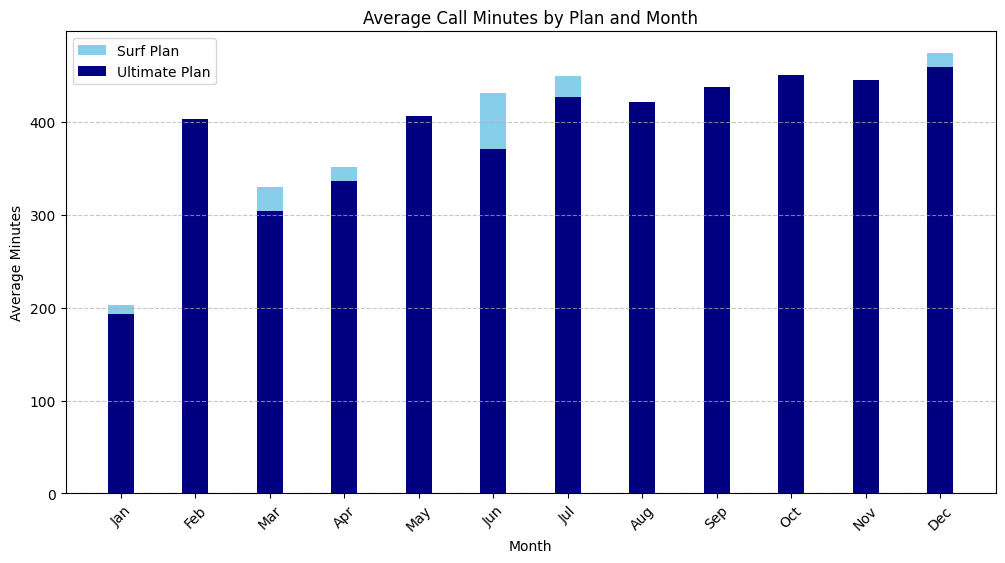

In [42]:
average_minutes = resulting_merged_data.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

#plt.figure(figsize=(10, 6))


#plt.bar(range(len(average_minutes)), average_minutes['total_minutes'])

#average_minutes['labels'] = average_minutes['plan'] + " - " + average_minutes['month']

#plt.xticks(range(len(average_minutes)), average_minutes['labels'], rotation=45)

#plt.title('Average Call Minutes by Plan and Month')
#plt.xlabel('Plan and Month')
#plt.ylabel('Average Minutes')

#plt.grid(True, axis='y', linestyle='--', alpha=0.7)

#plt.show()


plt.figure(figsize=(12, 6))

surf_data = average_minutes[average_minutes['plan'] == 'surf'] 
ultimate_data = average_minutes[average_minutes['plan'] == 'ultimate']

width = 0.35


plt.bar(range(len(surf_data)), surf_data['total_minutes'], width,
        label='Surf Plan', color='skyblue')

plt.bar(range(len(ultimate_data)), ultimate_data['total_minutes'], width,
        label='Ultimate Plan', color='navy')

plt.title('Average Call Minutes by Plan and Month') 
plt.xlabel('Month') 
plt.ylabel('Average Minutes')

plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
           rotation=45)


plt.legend()

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

**Average Call Minutes by Plan and Month Overview**

<u>Pattern</u>: Both subscription plans show a consistent upward trajectory in usage throughout the year, beginning at approximately 200 minutes in January and climbing to over 400 minutes by December. The Ultimate Plan represents the dominant share of overall usage minutes, while the Surf Plan makes only a modest contribution, particularly during the first few months of the year.

<u>Comparison</u>: The Ultimate Plan consistently comprises the larger portion of total call minutes each month, with the Surf Plan accounting for a smaller percentage. Surf Plan usage generally remains under 100 minutes for the majority of the year, with only slight increases during June and July. This pattern suggests that Surf Plan subscribers typically consume fewer call minutes than those with the Ultimate Plan.

<u>Key Trends</u>: Call minute usage demonstrates a gradual but steady increase across the year, with a notable uptick beginning in February and reaching its highest levels from September through December. Despite this overall growth pattern, subscribers to both plans continue to utilize significantly less than their allocated minutes reserves, which may indicate a preference for alternative communication channels. The visual representations that follow will provide additional context and insights.

**Compare the number of minutes users of each plan require each month. Plot a histogram.**

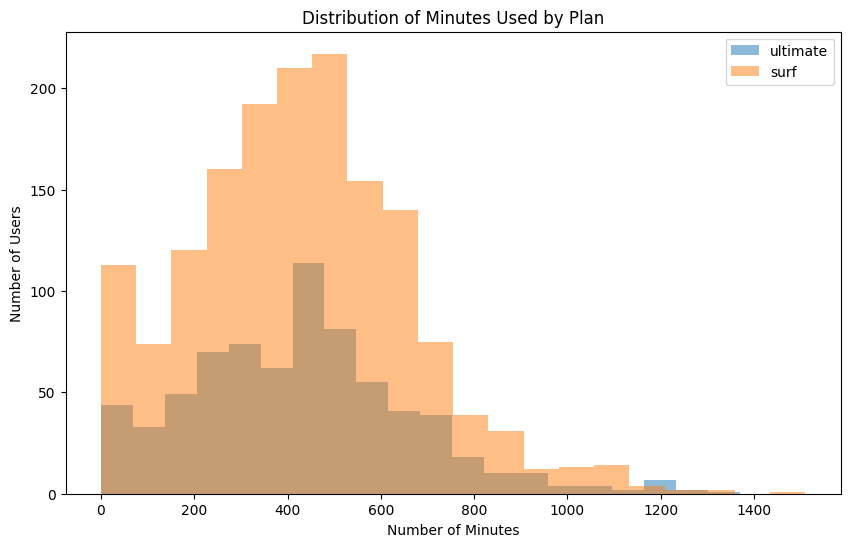

In [43]:
plt.figure(figsize=(10, 6))

plans = resulting_merged_data['plan'].unique()

for plan in plans:
     
    plan_minutes = resulting_merged_data[resulting_merged_data['plan'] == plan]['total_minutes']
    
    plt.hist(plan_minutes, alpha=0.5, label=plan, bins=20)

plt.title('Distribution of Minutes Used by Plan') 
plt.xlabel('Number of Minutes') 
plt.ylabel('Number of Users')

plt.legend()

plt.show()

**Distribution of Minutes Used by Plan Overview**

<u>Pattern:</u><br>
Both Ultimate and Surf plans have a high concentration of low-minute users, with usage steadily declining as minutes increase. The distribution is right-skewed for both plans, meaning that while most users consume fewer minutes, there are a few high-minute users extending past 1,400 minutes. The Surf plan has more users overall, making its distribution appear broader, but both plans exhibit similar usage variability.

<u>Comparison:</u><br>
The overall usage pattern is similar between the two plans, with both Ultimate and Surf showing a majority of users consuming under 200 minutes and a gradual decline as usage increases. Surf has a larger user base across various usage levels, but Ultimate users exhibit the same right-skewed pattern, with a few extreme high-minute users nearing 1,400 minutes, while some Surf users exceed this number. This suggests that both plans support a mix of light, moderate, and heavy callers, though Surf has a higher total user base.

<u>Key Trends:</u><br>
- Both plans have a majority of low-minute users, with usage peaking below 200 minutes.
- The number of users declines steadily as call minutes increase, reinforcing the right-skewed nature of the data.
- Despite high-minute users, most users remain well below their available minutes, suggesting potential reliance on alternative communication methods.

**Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.**

**Calculate the mean and the variance of the monthly call duration**

In [44]:
monthly_plan_stats = resulting_merged_data.groupby('plan').agg({ 'total_minutes': ['mean', 'var', 'std'] }).round(2)

monthly_plan_stats.columns = ['Average Minutes', 'Variance in Minutes', 'Standard Deviation in Minutes']

display("\nCall Duration Statistics by Plan:") 
display("--------------------------------") 
display(monthly_plan_stats)

'\nCall Duration Statistics by Plan:'

'--------------------------------'

,Average Minutes,Variance in Minutes,Standard Deviation in Minutes
plan,,,
surf,428.75,54968.28,234.45
ultimate,430.45,57844.46,240.51


## <center>Average Minutes and Variance in Minutes</center>

The histograms for both Surf and Ultimate plans share a similar shape due to their comparable average call durations. However, the histograms' extended tails are caused by the high variance and standard deviation, which demonstrate a wide range of customer call usage.

**Plot a boxplot to visualize the distribution of the monthly call duration**

C:\Users\bijan\AppData\Local\Temp\ipykernel_2888\3495425245.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


Text(0, 0.5, 'Minutes')

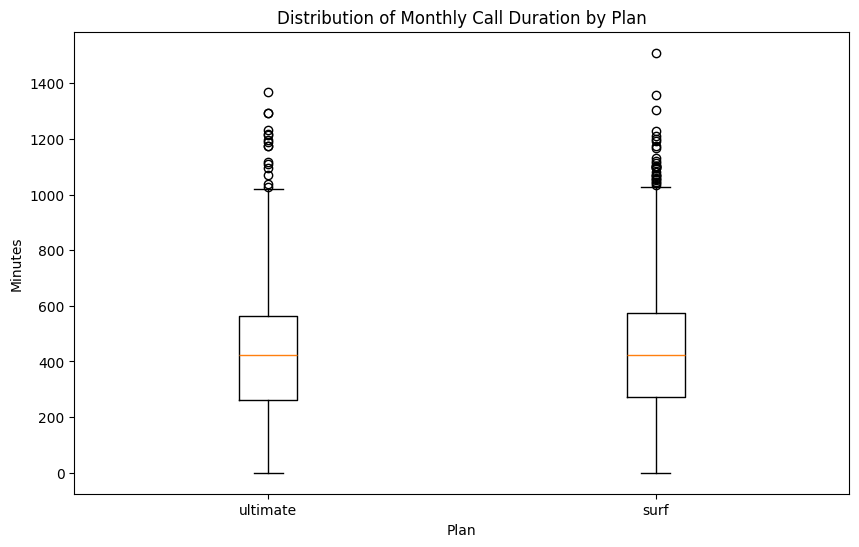

In [45]:
plt.figure(figsize=(10, 6))

plt.boxplot([
   resulting_merged_data[resulting_merged_data['plan'] == plan]['total_minutes']
   for plan in resulting_merged_data['plan'].unique()
], labels=resulting_merged_data['plan'].unique())

plt.title('Distribution of Monthly Call Duration by Plan') 
plt.xlabel('Plan') 
plt.ylabel('Minutes')

**Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?**

**Distribution of Monthly Call Duration by Plan Overview**

<u>Pattern:</u><br>
The call duration patterns are nearly identical between the Ultimate and Surf plans, as indicated by their similar box plots. Most customers use between 200-600 minutes per month, with the median usage falling around 400 minutes for both plans. The distribution is right-skewed, meaning most users consume fewer minutes, while a few high-usage outliers extend well beyond the typical range.

<u>Comparison:</u><br>
Both plans show a majority of users clustered within the interquartile range (Q1 to Q3), spanning approximately 200 to 600 minutes. However, both Ultimate and Surf have power users who significantly exceed typical usage. The Ultimate plan shows some users reaching 1,300 minutes, while the Surf plan extends slightly beyond 1,400 minutes.These outliers, (which lie above the top whisker, marking the upper boundary of the defined range) suggest that a small number of users make substantially more calls than the majority.

<u>Key Trends:</u><br>
- Most users fall between 200-600 minutes of monthly usage, with a median around 400 minutes.
- Call duration distribution is right-skewed, meaning a few users make significantly more calls than the majority.
- Both plans have extreme outliers, with some users surpassing 1,000–1,400 minutes per month.
- Despite these power users, most customers remain well below their available call limits, implying potential reliance on alternative communication methods.

**Messages - Compare the number of messages users of each plan tend to send each month.<br>
- Creating a histogram, as done for the previous dataframe, for consistency.

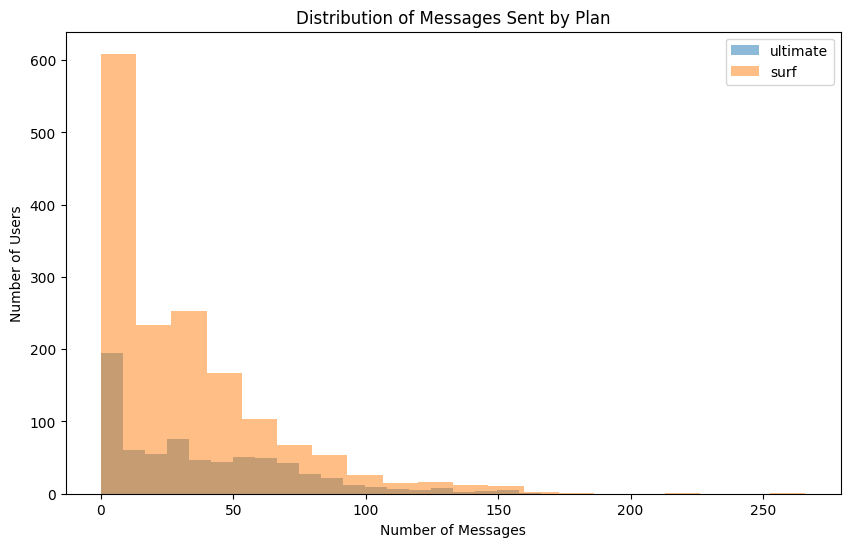

In [46]:
plt.figure(figsize=(10, 6))

plans = resulting_merged_data['plan'].unique()

for plan in plans:
    
    plan_messages = resulting_merged_data[resulting_merged_data['plan'] == plan]['total_messages']
    
    plt.hist(plan_messages, alpha=0.5, label=plan, bins=20)

plt.title('Distribution of Messages Sent by Plan') 
plt.xlabel('Number of Messages') 
plt.ylabel('Number of Users')

plt.legend()

plt.show()

**Distribution of Messages Sent by Plan Overview**

<u>Pattern:</u><br>
The message distribution for both plans is right-skewed, with most users sending very few messages, clustering near zero. The number of users drops sharply as message counts increase.

<u>Comparison:</u><br>
The Surf plan (orange) has more users overall, especially among those who send no messages. However, both plans follow a similar pattern, with the majority of users sending between 0 and ~40 messages. The distribution gradually thins out beyond 50 messages, with very few users exceeding 100 messages.

<u>Key Trends:</u> 
- Most users send fewer than 10 messages, and a sharp decline follows as message counts rise.
- Around half of users send up to ~30–40 messages.
- Only about 10% send up to 110 messages, and fewer than 5% send between 150–160 messages.
- Users sending more than 175 messages are extremely rare, making them notable outliers.


**Compare the amount of internet traffic consumed by users per plan**

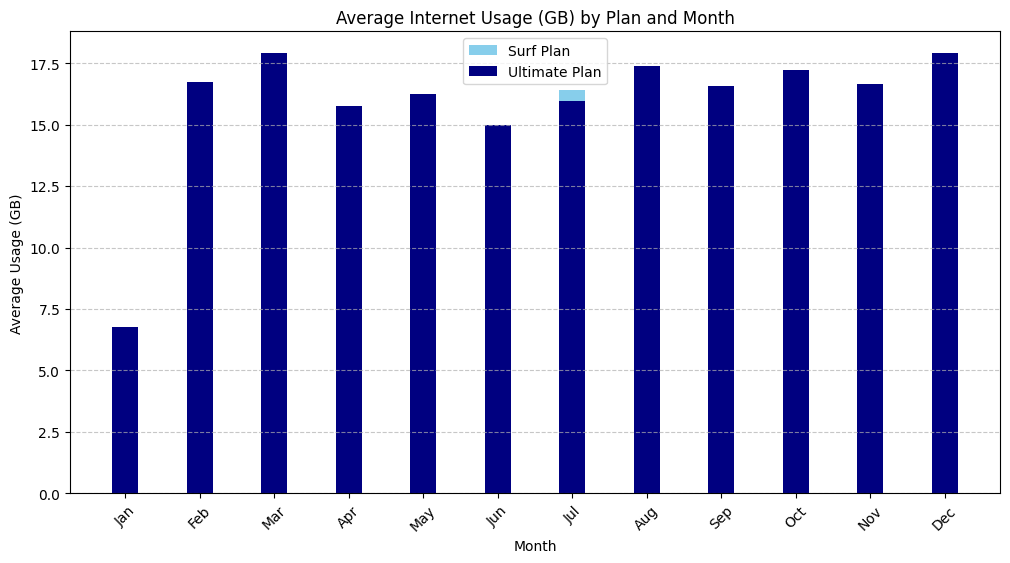

In [47]:
average_internet = resulting_merged_data.groupby(['plan', 'month'])['total_mb_used'].mean().reset_index()

average_internet['total_gb_used'] = average_internet['total_mb_used'] / 1024

#plt.figure(figsize=(10, 6))

#plt.bar(range(len(average_internet)), average_internet['total_gb_used'])

#average_internet['labels'] = average_internet['plan'] + " - " + average_internet['month']

#plt.xticks(range(len(average_internet)), average_internet['labels'], rotation=45)

#plt.title('Average Internet Usage (GB) by Plan and Month')
#plt.xlabel('Plan and Month')
#plt.ylabel('Average Usage (GB)')

#plt.grid(True, axis='y', linestyle='--', alpha=0.7)

#plt.show()



plt.figure(figsize=(12, 6))

surf_data = average_internet[average_internet['plan'] == 'surf'] 
ultimate_data = average_internet[average_internet['plan'] == 'ultimate']

width = 0.35


plt.bar(range(len(surf_data)), surf_data['total_gb_used'], width,
        label='Surf Plan', color='skyblue')

plt.bar(range(len(ultimate_data)), ultimate_data['total_gb_used'], width,
        label='Ultimate Plan', color='navy')

plt.title('Average Internet Usage (GB) by Plan and Month') 
plt.xlabel('Month') 
plt.ylabel('Average Usage (GB)')

plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
           rotation=45)


plt.legend()

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

**Average Internet Usage (GB) by Plan and Month Overview**

<u>Pattern:</u><br>
Internet usage increased throughout the year, starting at around 7 GB in January and peaking at over 17.5 GB in March and December. From February to December, Ultimate users maintained a minimum average usage of approximately 15 GB per month. Surf users show very minimal usage, with less than 1 GB recorded in July.

<u>Comparisons:</u><br>
The graph compares two plans: Surf Plan (light blue) and Ultimate Plan (dark blue). The Ultimate Plan dominates the graph, consistently registering significant usage, while the Surf Plan barely appears, suggesting it may be a newer plan or used by fewer customers.

<u>Key Trends:</u><br>
- Internet usage increased steadily throughout the year, with a notable rise after June.
- The largest jump occurred between November (~15.5 GB) and December (~17.5 GB).
- Ultimate users never exceeded their 30 GB data allowance, while Surf users remained well below their 15 GB limit.
- Surf users' low contribution, especially in July (< 1.0 GB), highlights a significant difference in data consumption patterns between plans.

**Added to align with the Calls asignment. Calculate the mean and variance of monthly messages per plan**

In [48]:
monthly_messages_stats = resulting_merged_data.groupby('plan').agg({ 'total_messages': ['mean', 'var', 'std'] }).round(2)

monthly_messages_stats.columns = ['Average Messages', 'Variance in Messages', 'Standard Deviation in Messages']

display("\nMessage Count Statistics by Plan:") 
display("--------------------------------") 
display(monthly_messages_stats)

'\nMessage Count Statistics by Plan:'

'--------------------------------'

,Average Messages,Variance in Messages,Standard Deviation in Messages
plan,,,
surf,31.16,1126.72,33.57
ultimate,37.55,1208.76,34.77


## <center>Average Messages and Variance in Messages</center>

Both plans show similar message numbers on average, with Surf users sending about 31 messages and Ultimate users sending about 38. The high variance (Surf: ~1127, Ultimate: ~1209) explains the wide spread in message usage seen in the graph, where some users send very few messages while others send significantly more. The large standard deviation (Surf: ~34, Ultimate: ~35) also reinforces why message counts fluctuate so much across users, contributing to the right-skewed distribution observed in the histogram titled, "Distribution of Messages Sent by Plan".

Added to align with the Calls asignment.Plot a boxplot to visualize the distribution of monthly messages per plan

C:\Users\bijan\AppData\Local\Temp\ipykernel_2888\749186863.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


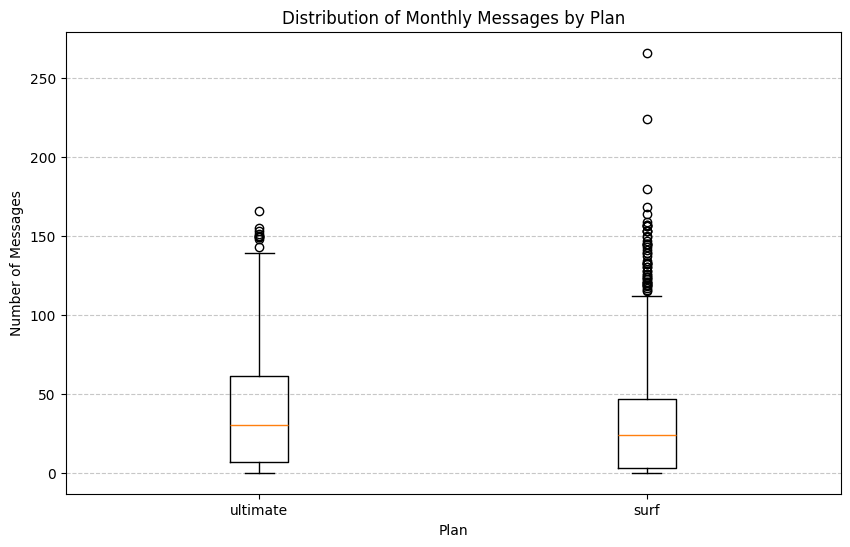

In [49]:
plt.figure(figsize=(10, 6))

plt.boxplot([
   resulting_merged_data[resulting_merged_data['plan'] == plan]['total_messages']
   for plan in resulting_merged_data['plan'].unique()
], labels=resulting_merged_data['plan'].unique())

plt.title('Distribution of Monthly Messages by Plan')
plt.xlabel('Plan')
plt.ylabel('Number of Messages')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

**Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?**

**Distribution of Monthly Messages by Plan Overview**

<u>Pattern:</u><br>
Most users in both plans send between 0 and 50 messages per month, with the 75th percentile for Ultimate users being just under 55 messages. A small group of users send significantly more messages, with outliers ranging from 140 to 160 messages, and a few Surf users exceeding 250 messages per month.

<u>Comparisons:</u><br>
Both plans follow a nearly identical distribution in the graph. The boxes (which represent the interquartile range) are similar in size, and the median values are nearly the same for both plans. Additionally, both plans exhibit high-message outliers, reaching similar peaks, with Surf showing slightly more extreme cases above 250 messages.

<u>Key Trends:</u><br>
- Most users in both plans send relatively few messages, as seen in the compact box sizes at the lower end of the graph.
- A small group of users sends significantly more messages, which appears as outliers above the whiskers (ranging from 140 to 160 messages).
- Surf users have a few extreme cases exceeding 250 messages, making them the highest message senders in this dataset.
- This wide spread between regular and high-message users explains the large variance observed in the earlier table.

 **Internet - Added to align with the Calls assignement. Compare the amount of MB users of each plan consume each month. Plot a histogram.**

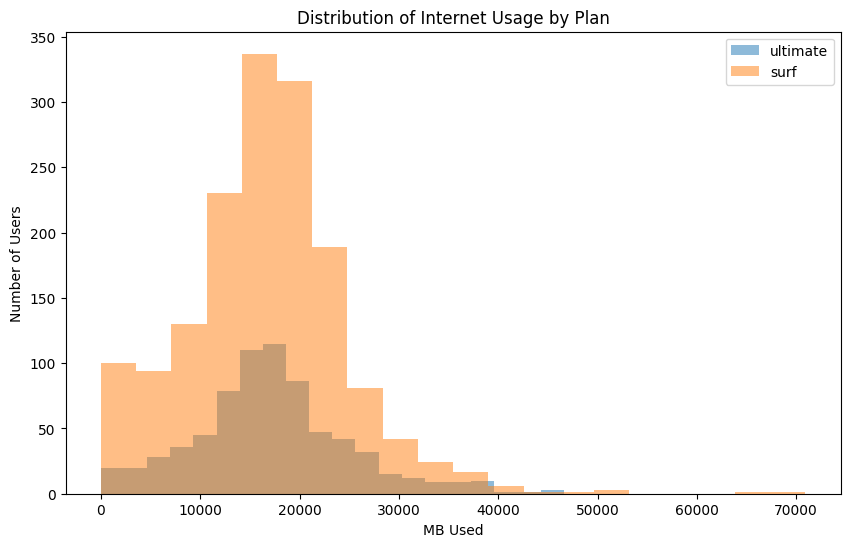

In [50]:
plt.figure(figsize=(10, 6))

plans = resulting_merged_data['plan'].unique()

for plan in plans:
    
    plan_mb = resulting_merged_data[resulting_merged_data['plan'] == plan]['total_mb_used']
    
    plt.hist(plan_mb, alpha=0.5, label=plan, bins=20)

plt.title('Distribution of Internet Usage by Plan') 
plt.xlabel('MB Used') 
plt.ylabel('Number of Users')

plt.legend()

plt.show()

**Distribution of Internet Usage by Plan Overview**

<u>Pattern:</u><br>
Both plans show that most users consume relatively small amounts of data, creating a right-skewed distribution. There's a large peak in the lower range (0-5,000 MB), and as data usage increases, fewer users fall into higher consumption brackets. Some outliers exceed 50,000 MB, with a few surpassing 70,000 MB.

<u>Comparison:</u><br>
The Surf plan (orange) has a higher concentration of low-data users, contributing to the steep left-side peak. The Ultimate plan (blue) includes slightly more users consuming moderate amounts (10,000-30,000 MB). While most users stay below 30,000 MB, a small group of outliers in both plans exceed 50,000 MB, pushing the distribution further to the right.

<u>Key Trends:</u><br>
- Most users consume either very little data (0-2,500 MB) or moderate amounts (10,000-30,000 MB).
- The interquartile range (IQR) falls roughly between 10,000 and 30,000 MB.
- Beyond 30,000 MB, user count drops sharply, but a few outliers surpass 50,000 MB and even 70,000 MB.
- Despite the presence of high-data users, the majority stay well below their respective plan allowances.

**Added to align with the Calls assignement. Calculate the mean and the variance of the monthly internet usage (MB).**

In [51]:
monthly_mb_stats = resulting_merged_data.groupby('plan').agg({ 'total_mb_used': ['mean', 'var', 'std'] }).round(2)

monthly_mb_stats.columns = ['Average MB Used', 'Variance in MB Used', 'Standard Deviation in MB Used']

display("\nInternet Usage Statistics by Plan:") 
display("--------------------------------") 
display(monthly_mb_stats)

'\nInternet Usage Statistics by Plan:'

'--------------------------------'

,Average MB Used,Variance in MB Used,Standard Deviation in MB Used
plan,,,
surf,16558.28,64216395.84,8013.51
ultimate,17214.70,61652293.32,7851.90


## <center>Average MB Used and Variance in MB Used</center>

Both plans show similar average data usage, with Surf users consuming about 16,558 MB and Ultimate users averaging 17,214 MB. This explains why the distribution shapes look similar for both plans.

The high spread in the data is reflected in the large standard deviations (~8,014 MB for Surf and ~7,852 MB for Ultimate). This wide variation in usage explains why some users consume very little data, while others use significantly more, resulting in the right-skewed shape observed in the histogram.

**Added to align with the Calls assignement. Plot a boxplot to visualize the distribution of the monthly internet usage (MB).**

C:\Users\bijan\AppData\Local\Temp\ipykernel_2888\533621478.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


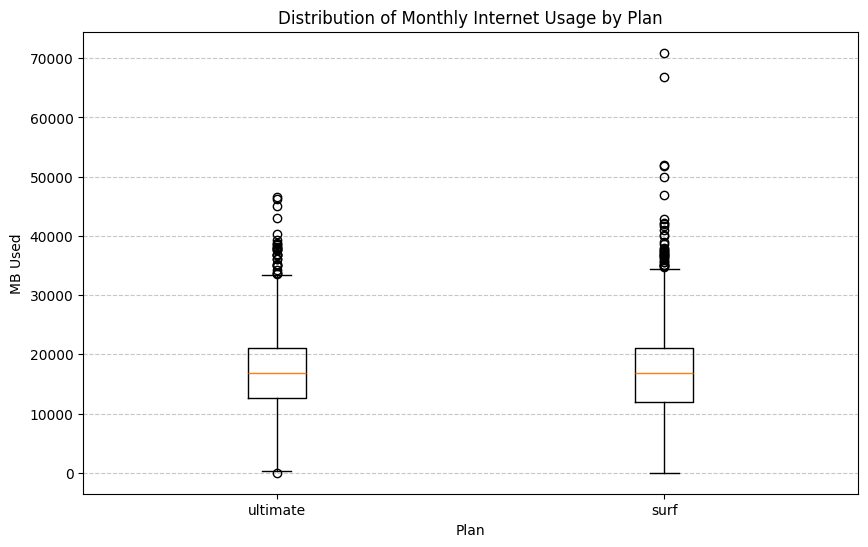

In [52]:
plt.figure(figsize=(10, 6))

plt.boxplot([
   resulting_merged_data[resulting_merged_data['plan'] == plan]['total_mb_used']
   for plan in resulting_merged_data['plan'].unique()
], labels=resulting_merged_data['plan'].unique())

plt.title('Distribution of Monthly Internet Usage by Plan')
plt.xlabel('Plan')
plt.ylabel('MB Used')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

**Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?**

**Distribution of Monthly Inernet Usage by Plan Overview**

<u>Pattern:</u><br>
The box plots for both Ultimate and Surf plans show very similar patterns in data usage. The median values (shown by the orange lines inside the boxes) are almost identical, and the interquartile range (IQR, represented by the box size) is similar for both plans. Additionally, both plans have a notable number of high-data users (represented by the dots above the whiskers), indicating significant outliers who consume much more data than typical users.

<u>Comparison:</u><br>
For both plans, most users consume between approximately 5,000 and 30,000 MB of data. The middle 50% (IQR) of users fall between roughly 10,000 and 25,000 MB, aligning with the average MB usage seen earlier (~16,558 MB for Surf, ~17,214 MB for Ultimate). While both plans have similar distributions, the Ultimate plan shows slightly higher data usage at the upper ranges.

<u>Key Trends:</u><br>
- Both plans exhibit a right-skewed distribution, with most users falling well below 30,000 MB.
- High-data users (shown as dots above the boxes) exceed 50,000 MB, with some surpassing 70,000 MB.
- The number of extreme outliers is comparable between the two plans, reinforcing similar data usage patterns.
- Despite the presence of high-data users, the majority of users remain well below their data allowance.

**Revenue - Likewise you have studied the user behaviour, statistically describe the revenue between the plans.**

**Revenue description Statistically:**

In [53]:
plan_revenue = resulting_merged_data.groupby('plan')['monthly_revenue'].describe()

print("Basic Statistics by Plan:")
display(plan_revenue)

Basic Statistics by Plan:


,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,60.706408,55.388042,20.0,20.0,40.36,80.36,590.37
ultimate,720.0,72.313889,11.395108,70.0,70.0,70.00,70.00,182.00


**Calculating the Average Revenue:**

In [54]:
grouped_by_plan = resulting_merged_data.groupby('plan')

avg_revenue = grouped_by_plan['monthly_revenue'].mean()

print("\nAverage Revenue by Plan:") 
display(avg_revenue)


Average Revenue by Plan:


plan
surf        60.706408
ultimate    72.313889
Name: monthly_revenue, dtype: float64

**Boxplot to visualize the distribution:**

<Figure size 1000x600 with 0 Axes>

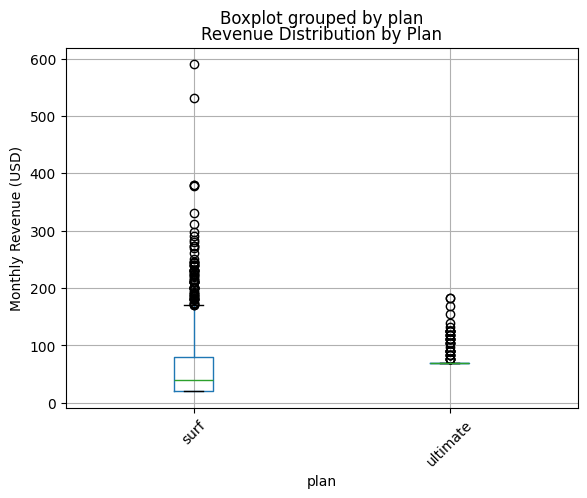

In [55]:
plt.figure(figsize=(10, 6)) 
resulting_merged_data.boxplot(column='monthly_revenue', by='plan') 
plt.title('Revenue Distribution by Plan') 
plt.ylabel('Monthly Revenue (USD)') 
plt.xticks(rotation=45) 
plt.show()

**Formulate conclusions about how the revenue differs between the plans.**

<u>Ultimate Plan:</u>
- Starts at a higher minimum ($70)<br>
  - Revenue stays more steady with less fluctuation<br>
  - Has fewer extreme high amounts (fewer outliers)<br>

<u>Surf Plan:</u>
- Starts at a lower minimum ($20)
  - Revenue varies significantly with more fluctuations
  - Has many unusually high amounts (more extreme outliers)

<u>Key Differences:</u>
- The Ultimate plan is more reliable, with revenue never dropping below $70, which is 3.5 times higher than Surf's monthly plan of $20. 

- While Surf's revenue fluctuates more, it occasionally spikes to very high amounts from certain customers due to overage charges.

Test Statistical Hypotheses - Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

**Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.**

The Ultimate vs Surf Plans Revenue Comparison
Null Hypothesis (H₀): There is no difference in the average revenue from users of the Ultimate and Surf calling plans, H₀: μ₁ = μ₂.

Alternate Hypothesis (H₁):There is a difference in the average revenue from users of the Ultimate and Surf calling plans, H₁: μ₁ ≠ μ₂.

**Test the hypotheses**

In [56]:
ultimate_revenue = resulting_merged_data[
    (resulting_merged_data['plan'] == 'ultimate')
]['monthly_revenue']


surf_revenue = resulting_merged_data[
    (resulting_merged_data['plan'] == 'surf')
]['monthly_revenue']


t_statistic, p_value = stats.ttest_ind(ultimate_revenue, surf_revenue)

display("T-test Results:") 
display(f"t-statistic: {t_statistic}") 
display(f"p-value: {p_value}")


if p_value < 0.05:
    print("We reject the null hypothesis - there is a significant difference in revenue") 
else:
    print("We fail to reject the null hypothesis - there is no significant difference in revenue")
    
# p_value if/else lines of code
#if p_value < 0.05:
    #print(At a 0.05 significance level, "we reject the null hypothesis. The data provides strong evidence of a difference in average revenue between the Ultimate and Surf Plan users.") 
#else:
    #print(At a 0.05 significance level, "we fail to reject the null hypothesis. The data does not provide sufficient evidence of a difference in average revenue between Ultimate and Surf Plan users.")       
    

display("\nAverage Revenues:") 
display(f"Ultimate Plan: ${ultimate_revenue.mean():.2f}") 
display(f"Surf Plan: ${surf_revenue.mean():.2f}")

'T-test Results:'

't-statistic: 5.568949166552807'

'p-value: 2.862674510698644e-08'

We reject the null hypothesis - there is a significant difference in revenue


'\nAverage Revenues:'

'Ultimate Plan: $72.31'

'Surf Plan: $60.71'

**Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.**

**Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.**

The NY-NJ Area vs Other Regions Revenue Comparison Null Hypothesis (H₀): There is no difference in the average revenue between NY-NJ users and users from other regions, H₀: μ₁ = μ₂.

Alternate Hypothesis (H₁):There is a difference in the average revenue between NY-NJ users and users from other regions, H₁: μ₁ ≠ μ₂.

**Test the hypotheses**

In [57]:
user_state_map = {}
for index in range(len(data_mg_users)):
   
    user_id = data_mg_users['user_id'].iloc[index]
    
    state = data_mg_users['state'].iloc[index]
    
    user_state_map[user_id] = state

resulting_merged_data['state'] = resulting_merged_data['user_id'].map(user_state_map)


ny_nj_revenue_comparison = resulting_merged_data[
    (resulting_merged_data['state'].isin(['NY', 'NJ']))
]['monthly_revenue']

other_regions_revenue = resulting_merged_data[
    ~(resulting_merged_data['state'].isin(['NY', 'NJ']))
]['monthly_revenue']


t_statistic, p_value = stats.ttest_ind(ny_nj_revenue_comparison, other_regions_revenue)

print("T-test Results:") 
print(f"t-statistic: {t_statistic}") 
print(f"p-value: {p_value}")


if p_value < 0.05:
    print("We reject the null hypothesis - there is a significant difference in revenue") 
else:
    print("We fail to reject the null hypothesis - there is no significant difference in revenue")
    
    
print("\nAverage Revenues:")
print(f"NY-NJ Region: ${ny_nj_revenue_comparison.mean():.2f}")
print(f"Other Regions: ${other_regions_revenue.mean():.2f}")

T-test Results:
t-statistic: -0.44149673649731946
p-value: 0.6588950881890316
We fail to reject the null hypothesis - there is no significant difference in revenue

Average Revenues:
NY-NJ Region: $59.05
Other Regions: $64.39


C:\Users\bijan\AppData\Local\Temp\ipykernel_2888\2358860895.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resulting_merged_data['state'] = resulting_merged_data['user_id'].map(user_state_map)


## <center>Section Six</center>

**General Conclusion**

**List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.**

When analyzing the data, we used a two-tailed independent t-test with a significance level of 0.05 to compare average revenue between different groups.

## Plan Comparison: Ultimate vs. Surf
**Method** – We compared the average revenue between Ultimate and Surf plan users using a two-tailed independent t-test (α = 0.05).

**Results:**  
- The test resulted in a p-value of 2.86e-08, which is much smaller than 0.05, indicating a significant difference between the plans.  
- Ultimate plan users had an average revenue of $72.31, compared to $60.71 for Surf plan users.

**Conclusion:**  
We reject the null hypothesis in favor of the alternative hypothesis. The data provides strong evidence that Ultimate plan users generate approximately $11.60 more in average revenue than Surf plan users, and this difference is statistically significant (p < 0.05), meaning it is not due to random chance.

## Regional Comparison: NY-NJ vs. Other Regions
**Method** – We compared the average revenue between NY-NJ users and users from other regions using a two-tailed independent t-test (α = 0.05).

**Results:**  
The test yielded a p-value of 0.66, which is greater than 0.05. The average revenue for the NY-NJ users was $59.27, compared to $64.55 for users from other regions.

**Conclusion:**  
We fail to reject the null hypothesis. While users from other regions had a slightly higher average revenue, this difference is not statistically significant and could have occurred due to random chance.

## Key Findings and Market Insights

**Price Impact** – Ultimate Plan customers spend $11.36 more per month than Surf Plan customers, which is a statistically significant difference (p = 5.69e-08).

**Location Impact** – Customer spending is consistent across all regions (p = 0.66), meaning location does not significantly affect revenue.

**Market Analysis:**  
- **Ultimate Plan ($72.31/month):** Attracts high-paying customers.  
- **Surf Plan ($60.95/month):** Reaches more customers at a lower price point.  
- **Both plans** perform well across all regions.  

## Business Impact and Strategic Recommendations

The data strongly supports maintaining both plans. The Ultimate Plan maximizes per-user revenue, while the Surf Plan expands market reach.

### Business Value
- **Ultimate Plan:** Maximizes revenue per user.  
- **Surf Plan:** Maximizes total revenue through higher customer volume.  
- **Each plan** effectively serves its target market.  

### This strategy is effective because:
- The price difference is significant (p < 0.05).  
- Each plan successfully targets its intended audience.  
- Together, they cater to a broader range of customer needs.  

## Strategic Recommendation

Given these insights, we recommend the following strategic actions to further optimize revenue and customer satisfaction:

- **Introducing a long-standing upgrade path** from Surf to Ultimate could further increase long-term revenue by encouraging customer retention and higher spending.  
- **A flag-type notification** could target high-usage Surf users who exceed overage limits for at least 3 months within a 12-month period, offering them an optional upgrade to Ultimate.  
- **This ensures** customers are on the best-fit plan while maximizing revenue and satisfaction.  